In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from statsmodels.formula.api import ols
import statsmodels as sm
import statsmodels.api as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('HepCDF.csv', index_col=0)

In [4]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Transplant
0,56,0,35,0,0,0,0,0,0,0,7425,4248807,14,112132,99,84,52,109,81,84,84,34,655330,634536,288194,386384,387088,13,0
1,46,0,29,0,0,0,0,0,0,0,12101,4429425,10,129367,91,123,95,75,113,57,123,44,40620,538635,637056,336804,31085,4,0
2,57,0,33,0,0,0,0,0,0,0,4178,4621191,12,151522,113,49,95,107,116,84,84,34,571148,661346,406373,735945,558829,4,1
3,49,0,33,0,0,0,0,0,0,0,6490,4794631,10,146457,43,64,109,80,88,48,77,33,1041941,449939,585688,744463,582301,10,0
4,59,0,32,0,0,0,0,0,0,0,3661,4606375,11,187684,99,104,67,48,120,94,90,30,660410,738756,3731527,338946,242861,11,0


In [5]:
data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Transplant
count,1385.000000,1385.0,1385.000000,1385.0,1385.0,1385.0,1385.0,1385.0,1385.0,1385.0,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,0.0,28.608664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.288809,83.800722,33.501083,5.909512e+05,6.013275e+05,4.017151e+05,394786.355235,398140.533574,10.164621,0.261372
std,8.781506,0.0,4.076215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.146769,25.966617,6.948315,3.539354e+05,3.619547e+05,2.220597e+05,195584.622749,198375.078731,3.822135,0.439541
min,32.000000,0.0,22.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,22.000000,1.100000e+01,1.900000e+02,6.170000e+02,408.000000,570.000000,3.000000,0.000000
25%,39.000000,0.0,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.725070e+05,2.699330e+05,284760.000000,275007.000000,7.000000,0.000000
50%,46.000000,0.0,29.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,84.000000,34.000000,5.931030e+05,5.981280e+05,4.063730e+05,386384.000000,387088.000000,11.000000,0.000000
75%,54.000000,0.0,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,1.000000
max,61.000000,0.0,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 31 columns):
Unnamed: 0                         1385 non-null int64
Age                                1385 non-null int64
Gender                             1385 non-null int64
BMI                                1385 non-null int64
Fever                              1385 non-null int64
Nausea/Vomting                     1385 non-null int64
Headache                           1385 non-null int64
Diarrhea                           1385 non-null int64
Fatigue & generalized bone ache    1385 non-null int64
Jaundice                           1385 non-null int64
Epigastric pain                    1385 non-null int64
WBC                                1385 non-null int64
RBC                                1385 non-null int64
HGB                                1385 non-null int64
Plat                               1385 non-null int64
AST 1                              1385 non-null int64
ALT 1        

In [8]:
map_dummies = {'Gender': {1: '0', 2: '1'},
              'Fever': {1: '0', 2: '1'},
              'Nausea/Vomting': {1: '0', 2: '1'},
              'Headache': {1: '0', 2: '1'},
              'Diarrhea': {1: '0', 2: '1'},
              'Fatigue & generalized bone ache': {1: '0', 2: '1'},
              'Jaundice': {1: '0', 2: '1'},
              'Epigastric pain': {1: '0', 2: '1'}}

In [9]:
data.replace(map_dummies, inplace=True)
data.head()

,Unnamed: 0,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,...,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,Transplant
0,0,56,0,35,0,0,0,0,0,0,...,84,34,655330,634536,288194,386384,387088,13,2,0
1,1,46,0,29,0,0,0,0,0,0,...,123,44,40620,538635,637056,336804,31085,4,2,0
2,2,57,0,33,0,0,0,0,0,0,...,84,34,571148,661346,406373,735945,558829,4,4,1
3,3,49,0,33,0,0,0,0,0,0,...,77,33,1041941,449939,585688,744463,582301,10,3,0
4,4,59,0,32,0,0,0,0,0,0,...,90,30,660410,738756,3731527,338946,242861,11,1,0


In [10]:
#create new column for transplant candidates
data['Transplant'] = np.where(data['Baselinehistological staging']==4, '1', '0')

In [11]:
data.head()

,Unnamed: 0,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,...,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,Transplant
0,0,56,0,35,0,0,0,0,0,0,...,84,34,655330,634536,288194,386384,387088,13,2,0
1,1,46,0,29,0,0,0,0,0,0,...,123,44,40620,538635,637056,336804,31085,4,2,0
2,2,57,0,33,0,0,0,0,0,0,...,84,34,571148,661346,406373,735945,558829,4,4,1
3,3,49,0,33,0,0,0,0,0,0,...,77,33,1041941,449939,585688,744463,582301,10,3,0
4,4,59,0,32,0,0,0,0,0,0,...,90,30,660410,738756,3731527,338946,242861,11,1,0


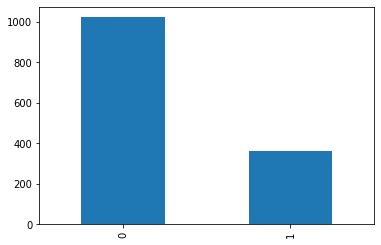

In [12]:
data['Transplant'].value_counts().plot(kind='bar')

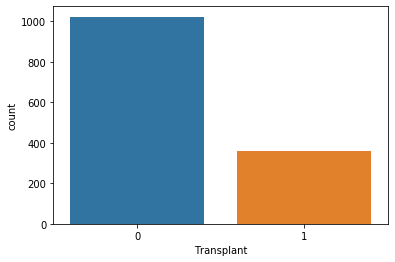

In [13]:
#sns.set(style="darkgrid")
ax = sns.countplot(x="Transplant", data=data)


In [14]:
data['Transplant'].value_counts()

0    1023
1     362
Name: Transplant, dtype: int64

In [15]:
#df[df.data == 0] = np.nan
#df.fillna(df.median())

data[data == 5] = np.nan
df_edit = data.fillna(data.median())

In [16]:
df_edit.head()

,Unnamed: 0,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,...,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,Transplant
0,0.0,56,0,35,0,0,0,0,0,0,...,84,34,655330,634536,288194,386384,387088,13,2,0
1,1.0,46,0,29,0,0,0,0,0,0,...,123,44,40620,538635,637056,336804,31085,4,2,0
2,2.0,57,0,33,0,0,0,0,0,0,...,84,34,571148,661346,406373,735945,558829,4,4,1
3,3.0,49,0,33,0,0,0,0,0,0,...,77,33,1041941,449939,585688,744463,582301,10,3,0
4,4.0,59,0,32,0,0,0,0,0,0,...,90,30,660410,738756,3731527,338946,242861,11,1,0


In [17]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 31 columns):
Unnamed: 0                         1385 non-null float64
Age                                1385 non-null int64
Gender                             1385 non-null object
BMI                                1385 non-null int64
Fever                              1385 non-null object
Nausea/Vomting                     1385 non-null object
Headache                           1385 non-null object
Diarrhea                           1385 non-null object
Fatigue & generalized bone ache    1385 non-null object
Jaundice                           1385 non-null object
Epigastric pain                    1385 non-null object
WBC                                1385 non-null int64
RBC                                1385 non-null int64
HGB                                1385 non-null int64
Plat                               1385 non-null int64
AST 1                              1385 non-null int64
ALT

In [18]:
df_edit['ALT 36'] = df_edit['ALT 36'].astype('int64')
df_edit['ALT 48'] = df_edit['ALT 48'].astype('int64')
df_edit['ALT after 24 w'] = df_edit['ALT after 24 w'].astype('int64')
df_edit['RNA 4'] = df_edit['RNA 4'].astype('int64')
df_edit['RNA 12'] = df_edit['RNA 12'].astype('int64')
df_edit['RNA EOT'] = df_edit['RNA EOT'].astype('int64')
df_edit['RNA EF'] = df_edit['RNA EF'].astype('int64')
df_edit['RNA 4'] = df_edit['RNA 4'].astype('int64')
df_edit['Baseline histological Grading'] = df_edit['Baseline histological Grading'].astype('int64') #re-replace with non-median values
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 31 columns):
Unnamed: 0                         1385 non-null float64
Age                                1385 non-null int64
Gender                             1385 non-null object
BMI                                1385 non-null int64
Fever                              1385 non-null object
Nausea/Vomting                     1385 non-null object
Headache                           1385 non-null object
Diarrhea                           1385 non-null object
Fatigue & generalized bone ache    1385 non-null object
Jaundice                           1385 non-null object
Epigastric pain                    1385 non-null object
WBC                                1385 non-null int64
RBC                                1385 non-null int64
HGB                                1385 non-null int64
Plat                               1385 non-null int64
AST 1                              1385 non-null int64
ALT

In [19]:
df_edit.to_csv('HepCDF.csv')

In [50]:
data = pd.read_csv('HepCDF.csv', index_col=0)

In [51]:
data.head()

,Unnamed: 0.1,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,Transplant
0,0.0,56,0,35,0,0,0,0,0,0,0,7425,4248807,14,112132,99,84,52,109,81,84,84,34,655330,634536,288194,386384,387088,13,2,0
1,1.0,46,0,29,0,0,0,0,0,0,0,12101,4429425,10,129367,91,123,95,75,113,57,123,44,40620,538635,637056,336804,31085,4,2,0
2,2.0,57,0,33,0,0,0,0,0,0,0,4178,4621191,12,151522,113,49,95,107,116,84,84,34,571148,661346,406373,735945,558829,4,4,1
3,3.0,49,0,33,0,0,0,0,0,0,0,6490,4794631,10,146457,43,64,109,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3,0
4,4.0,59,0,32,0,0,0,0,0,0,0,3661,4606375,11,187684,99,104,67,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1,0


In [52]:
data.drop(['Unnamed: 0.1'], axis = 1, inplace=True)

In [53]:
data.drop(['Baselinehistological staging'], axis = 1, inplace=True)

In [54]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Transplant
0,56,0,35,0,0,0,0,0,0,0,7425,4248807,14,112132,99,84,52,109,81,84,84,34,655330,634536,288194,386384,387088,13,0
1,46,0,29,0,0,0,0,0,0,0,12101,4429425,10,129367,91,123,95,75,113,57,123,44,40620,538635,637056,336804,31085,4,0
2,57,0,33,0,0,0,0,0,0,0,4178,4621191,12,151522,113,49,95,107,116,84,84,34,571148,661346,406373,735945,558829,4,1
3,49,0,33,0,0,0,0,0,0,0,6490,4794631,10,146457,43,64,109,80,88,48,77,33,1041941,449939,585688,744463,582301,10,0
4,59,0,32,0,0,0,0,0,0,0,3661,4606375,11,187684,99,104,67,48,120,94,90,30,660410,738756,3731527,338946,242861,11,0


In [55]:
data.to_csv('HepCDF.csv')

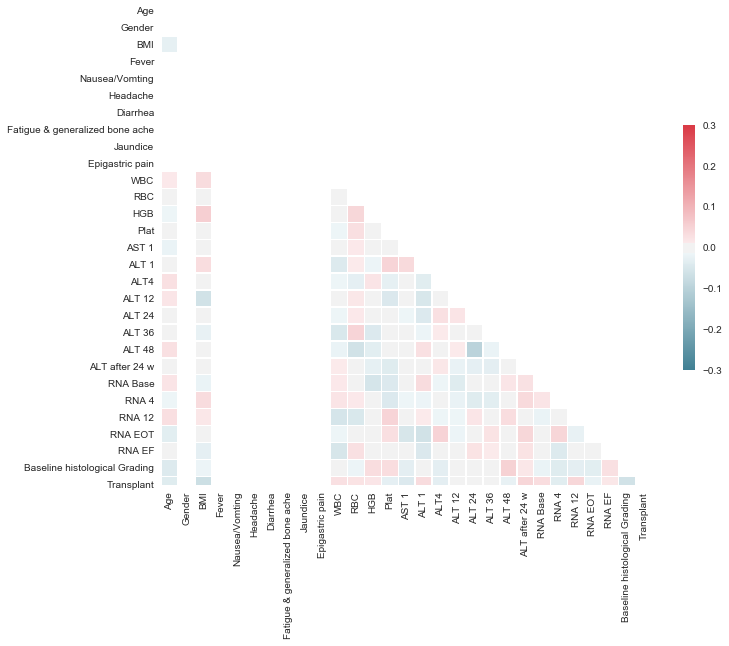

In [56]:
#compute correlation matrix
corr = data.corr()

#this masks the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#this sets up the figure
f, ax = plt.subplots(figsize=(11, 9))

#this is a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin= -0.3, vmax=0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

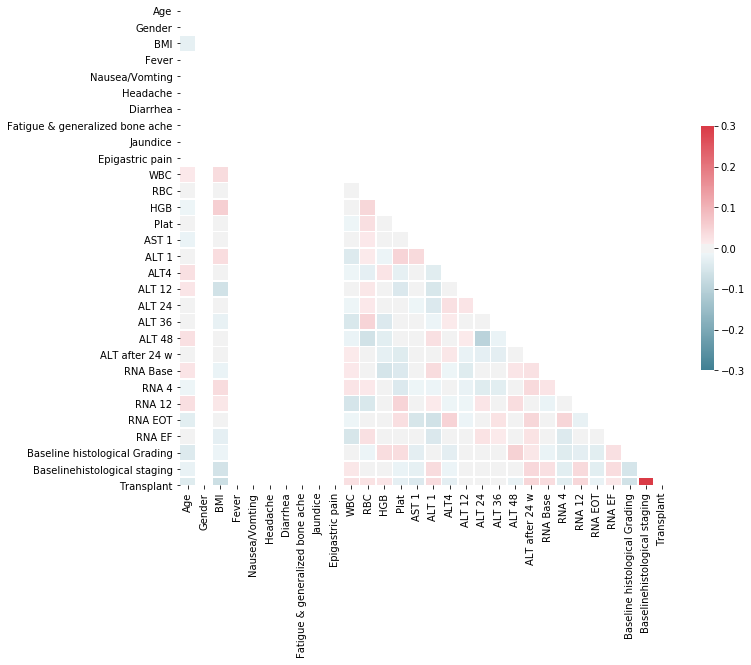

In [9]:
#compute correlation matrix
corr = data.corr()

#this masks the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#this sets up the figure
f, ax = plt.subplots(figsize=(11, 9))

#this is a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin= -0.3, vmax=0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
z_scores = pd.read_csv('z_scores.csv', index_col=0)

In [9]:
z_scores.head()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF
0,1.102814,1.568525,-0.040636,-0.500596,0.824497,-1.191726,0.624437,0.003232,-1.184223,0.978295,-0.103412,0.027210,0.007677,0.071830,0.181960,0.091781,-0.511404,-0.042976,-0.055735
1,-0.036355,0.096039,1.712476,0.021071,-1.510734,-0.747305,0.316553,1.508243,0.437185,-0.326634,1.118124,-1.005796,1.510148,1.511548,-1.555454,-0.173268,1.060192,-0.296564,-1.850979
2,1.216730,1.077696,-1.257991,0.574935,-0.343119,-0.176017,1.163233,-1.347418,0.437185,0.901534,1.232643,0.027210,0.007677,0.071830,-0.055972,0.165878,0.020983,1.744932,0.810316
3,0.305396,1.077696,-0.391183,1.075870,-1.510734,-0.306623,-1.530748,-0.768568,0.965086,-0.134733,0.163799,-1.350131,-0.261997,-0.072142,1.274675,-0.418404,0.828783,1.788499,0.928680
4,1.444564,0.832282,-1.451824,0.532143,-0.926927,0.756456,0.624437,0.775032,-0.618616,-1.362901,1.385335,0.409804,0.238827,-0.504057,0.196318,0.379821,15.000537,-0.285608,-0.783040


In [14]:
data_pearson = data.corr(method='pearson')
data_pearson

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Transplant
Age,1.000000,NaN,-0.025353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014310,-0.002162,-0.012810,-0.002225,-0.016633,0.005723,0.030260,0.019046,0.002712,-0.007054,0.029593,0.006353,0.022775,-0.013843,0.032765,-0.032483,-0.004907,-0.039196,-0.036602
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,-0.025353,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.036721,-0.004922,0.057987,-0.003093,0.001806,0.034037,0.001416,-0.059659,0.007909,-0.021623,0.000778,-0.009832,-0.016418,0.037015,0.017601,0.005428,-0.026527,-0.015248,-0.067484
Fever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nausea/Vomting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Headache,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fatigue & generalized bone ache,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jaundice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Epigastric pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


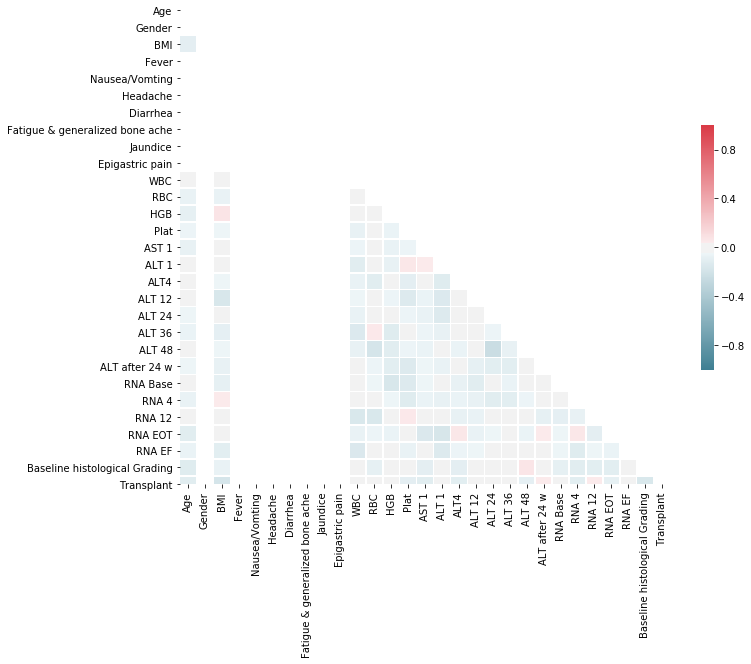

In [15]:
#compute correlation matrix pearson
corr = data_pearson.corr()

#this masks the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#this sets up the figure
f, ax = plt.subplots(figsize=(11, 9))

#this is a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
z_scores_pearson = z_scores.corr(method='pearson')
z_scores_pearson

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF
Age,1.000000,-0.025353,0.014310,-0.002162,-0.012810,-0.002225,-0.016633,0.005723,0.030260,0.019046,0.002712,-0.007054,0.029593,0.006353,0.022775,-0.013843,0.032765,-0.032483,-0.004907
BMI,-0.025353,1.000000,0.036721,-0.004922,0.057987,-0.003093,0.001806,0.034037,0.001416,-0.059659,0.007909,-0.021623,0.000778,-0.009832,-0.016418,0.037015,0.017601,0.005428,-0.026527
WBC,0.014310,0.036721,1.000000,0.006928,0.008786,-0.013097,-0.006985,-0.038014,-0.012926,-0.002510,-0.012506,-0.045578,-0.017624,0.011869,0.014624,0.021908,-0.053230,-0.012836,-0.049449
RBC,-0.002162,-0.004922,0.006928,1.000000,0.042320,0.032431,0.016259,0.011785,-0.027478,0.017021,0.015090,0.048985,-0.058859,0.005683,0.006175,0.014214,-0.046113,-0.001075,0.028568
HGB,-0.012810,0.057987,0.008786,0.042320,1.000000,-0.010320,-0.010636,-0.014767,0.022724,-0.006641,0.004213,-0.040207,-0.030900,-0.024268,-0.053244,-0.000847,0.011240,-0.005881,0.004423
Plat,-0.002225,-0.003093,-0.013097,0.032431,-0.010320,1.000000,-0.005205,0.047587,-0.025471,-0.043581,-0.003090,0.002756,-0.005497,-0.035605,-0.041284,-0.040032,0.047603,0.031383,-0.010118
AST 1,-0.016633,0.001806,-0.006985,0.016259,-0.010636,-0.005205,1.000000,0.037943,0.006913,-0.011067,-0.012951,-0.007293,-0.009099,0.002694,-0.001739,-0.012582,0.006706,-0.050878,0.004796
ALT 1,0.005723,0.034037,-0.038014,0.011785,-0.014767,0.047587,0.037943,1.000000,-0.033151,-0.046876,-0.040785,-0.015320,0.029585,-0.008171,0.036358,-0.014652,0.012590,-0.059921,-0.042292
ALT4,0.030260,0.001416,-0.012926,-0.027478,0.022724,-0.025471,0.006913,-0.033151,1.000000,0.004047,0.028424,0.013986,-0.006837,0.016939,-0.012893,-0.009889,-0.013065,0.050339,-0.003188
ALT 12,0.019046,-0.059659,-0.002510,0.017021,-0.006641,-0.043581,-0.011067,-0.046876,0.004047,1.000000,0.021715,-0.001570,0.012171,-0.019594,-0.036839,-0.018759,-0.012348,-0.014602,-0.003845


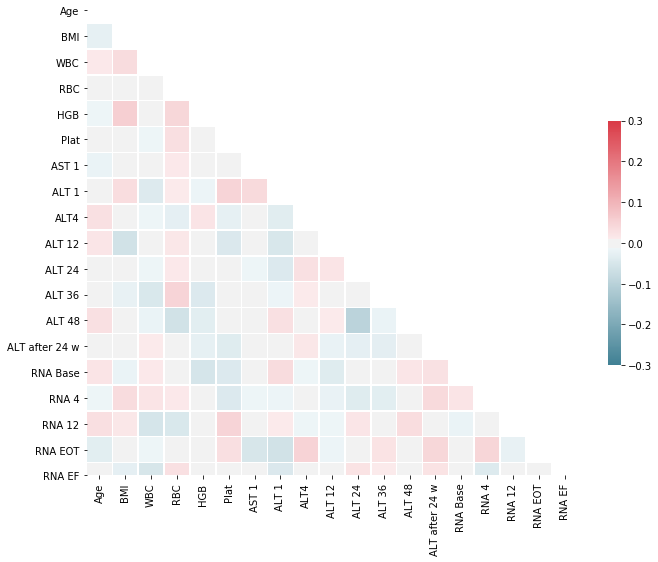

In [10]:
#compute correlation matrix
corr = z_scores.corr()

#this masks the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#this sets up the figure
f, ax = plt.subplots(figsize=(11, 9))

#this is a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin= -0.3, vmax=0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

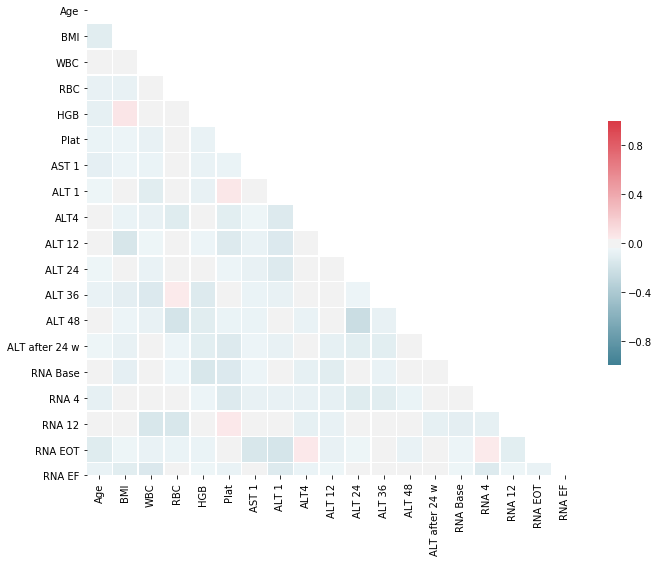

In [13]:
#compute correlation matrix pearson
corr = z_scores_pearson.corr()

#this masks the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#this sets up the figure
f, ax = plt.subplots(figsize=(11, 9))

#this is a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1384
Data columns (total 30 columns):
Age                                1385 non-null int64
Gender                             1385 non-null int64
BMI                                1385 non-null int64
Fever                              1385 non-null int64
Nausea/Vomting                     1385 non-null int64
Headache                           1385 non-null int64
Diarrhea                           1385 non-null int64
Fatigue & generalized bone ache    1385 non-null int64
Jaundice                           1385 non-null int64
Epigastric pain                    1385 non-null int64
WBC                                1385 non-null int64
RBC                                1385 non-null int64
HGB                                1385 non-null int64
Plat                               1385 non-null int64
AST 1                              1385 non-null int64
ALT 1                              1385 non-null int64
ALT4         

In [58]:
data['Age'] = data['Age'].astype('float64')
data['Gender'] = data['Gender'].astype('object')
data['Fever'] = data['Fever'].astype('object')
data['Nausea/Vomting'] = data['Nausea/Vomting'].astype('object')
data['Headache'] = data['Headache'].astype('object')
data['Diarrhea'] = data['Diarrhea'].astype('object')
data['Fatigue & generalized bone ache'] = data['Fatigue & generalized bone ache'].astype('object')
data['Jaundice'] = data['Jaundice'].astype('object')
data['Epigastric pain'] = data['Epigastric pain'].astype('object')
data['Baseline histological Grading'] = data['Baseline histological Grading'].astype('object')
data['Transplant'] = data['Transplant'].astype('object')
data['ALT 36'] = data['ALT 36'].astype('float64')
data['ALT 48'] = data['ALT 48'].astype('float64')
data['ALT after 24 w'] = data['ALT after 24 w'].astype('float64')
data['RNA 4'] = data['RNA 4'].astype('float64')
data['RNA 12'] = data['RNA 12'].astype('float64')
data['RNA EOT'] = data['RNA EOT'].astype('float64')
data['RNA EF'] = data['RNA EF'].astype('float64')
data['RNA 4'] = data['RNA 4'].astype('float64')
data['BMI'] = data['BMI'].astype('float64')
data['WBC'] = data['WBC'].astype('float64')
data['RBC'] = data['RBC'].astype('float64')
data['HGB'] = data['HGB'].astype('float64')
data['Plat'] = data['Plat'].astype('float64')
data['AST 1'] = data['AST 1'].astype('float64')
data['ALT 1'] = data['ALT 1'].astype('float64')
data['ALT4'] = data['ALT4'].astype('float64')
data['ALT 12'] = data['ALT 12'].astype('float64')
data['ALT 24'] = data['ALT 24'].astype('float64')
data['RNA Base'] = data['RNA Base'].astype('float64')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1384
Data columns (total 29 columns):
Age                                1385 non-null float64
Gender                             1385 non-null object
BMI                                1385 non-null float64
Fever                              1385 non-null object
Nausea/Vomting                     1385 non-null object
Headache                           1385 non-null object
Diarrhea                           1385 non-null object
Fatigue & generalized bone ache    1385 non-null object
Jaundice                           1385 non-null object
Epigastric pain                    1385 non-null object
WBC                                1385 non-null float64
RBC                                1385 non-null float64
HGB                                1385 non-null float64
Plat                               1385 non-null float64
AST 1                              1385 non-null float64
ALT 1                              1385 non-nu

In [60]:
from scipy.stats import zscore
numeric_cols = data.select_dtypes(include=[np.number]).columns
z_scores = data[numeric_cols].apply(zscore)
z_scores.head()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF
0,1.102814,1.568525,-0.040636,-0.500596,0.824497,-1.191726,0.624437,0.003232,-1.184223,0.978295,-0.103412,0.027210,0.007677,0.071830,0.181960,0.091781,-0.511404,-0.042976,-0.055735
1,-0.036355,0.096039,1.712476,0.021071,-1.510734,-0.747305,0.316553,1.508243,0.437185,-0.326634,1.118124,-1.005796,1.510148,1.511548,-1.555454,-0.173268,1.060192,-0.296564,-1.850979
2,1.216730,1.077696,-1.257991,0.574935,-0.343119,-0.176017,1.163233,-1.347418,0.437185,0.901534,1.232643,0.027210,0.007677,0.071830,-0.055972,0.165878,0.020983,1.744932,0.810316
3,0.305396,1.077696,-0.391183,1.075870,-1.510734,-0.306623,-1.530748,-0.768568,0.965086,-0.134733,0.163799,-1.350131,-0.261997,-0.072142,1.274675,-0.418404,0.828783,1.788499,0.928680
4,1.444564,0.832282,-1.451824,0.532143,-0.926927,0.756456,0.624437,0.775032,-0.618616,-1.362901,1.385335,0.409804,0.238827,-0.504057,0.196318,0.379821,15.000537,-0.285608,-0.783040


In [60]:
z_scores.to_csv('z_scores.csv')

In [ ]:
#code for creating plot with columns from 3 different dfs 

# a = np.linspace(-5,5, 11)
# data1 = np.sort(np.random.rand(len(a),5))
# data1[:,0] =a 
# data2 = np.sort(np.random.rand(len(a),5))*10
# data2[:,0] =a 
# df = pd.DataFrame(data1, columns=["A", "B1", "C1", "D1", "E1"])
# df2 = pd.DataFrame(data2, columns=["A", "B2", "C2", "D2", "E2"])

# fig, ax = plt.subplots()
# ax2 = ax.twinx()

# df.plot(x="A", y=["B1", "C1", "D1", "E1"], ax=ax)
# df2.plot(x="A", y=["B2", "C2", "D2", "E2"], ax=ax2, ls="--")

# plt.show()

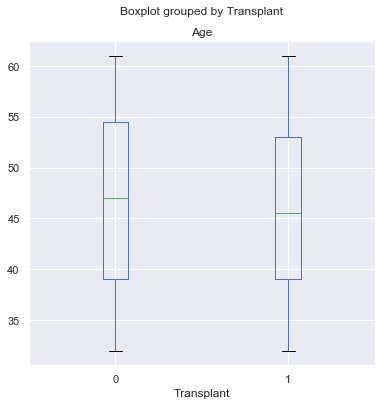

In [102]:
data.boxplot('Age', by='Transplant', figsize=(6, 6))

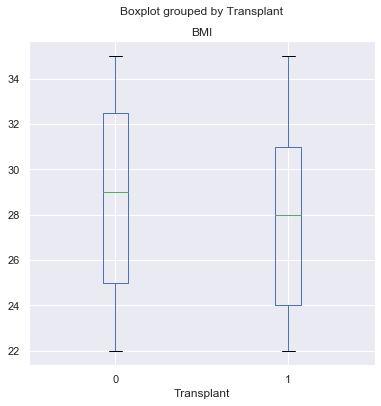

In [103]:
data.boxplot('BMI', by='Transplant', figsize=(6, 6))

In [ ]:
data.boxplot('BMI', by='Transplant', figsize=(6, 6))

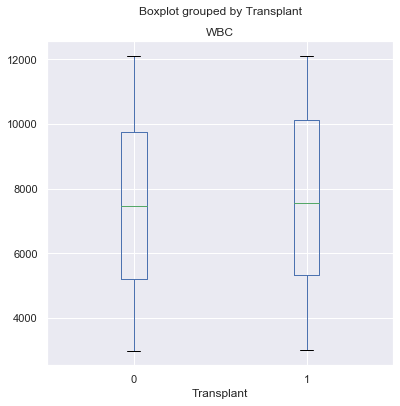

In [104]:
data.boxplot('WBC', by='Transplant', figsize=(6, 6))

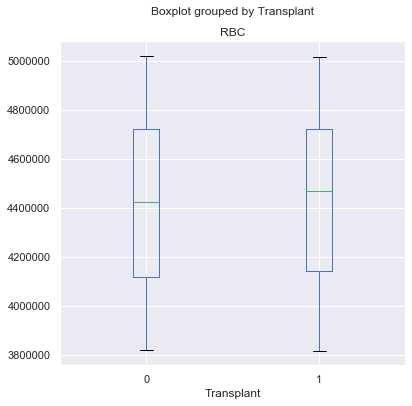

In [105]:
data.boxplot('RBC', by='Transplant', figsize=(6, 6))

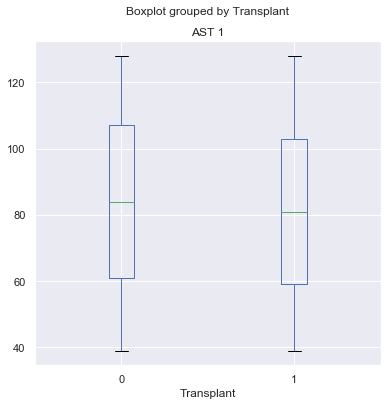

In [106]:
data.boxplot('AST 1', by='Transplant', figsize=(6, 6))

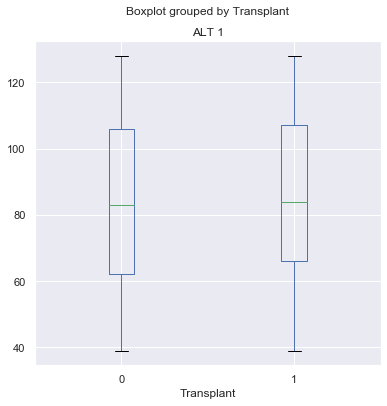

In [107]:
data.boxplot('ALT 1', by='Transplant', figsize=(6, 6))

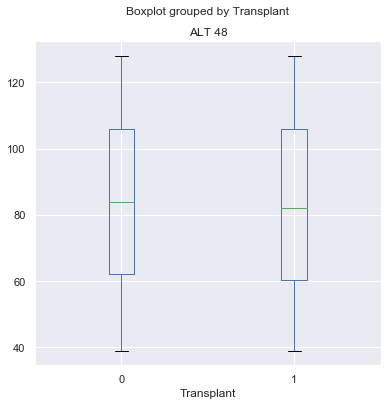

In [108]:
data.boxplot('ALT 48', by='Transplant', figsize=(6, 6))

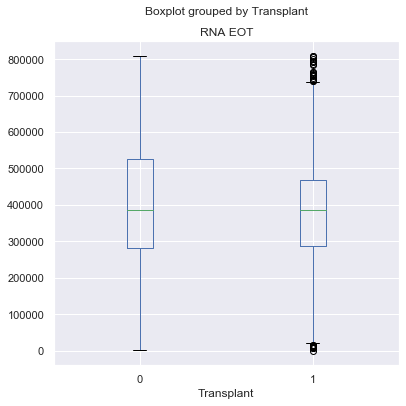

In [110]:
#this is somewhat different but i don't know why
data.boxplot('RNA EOT', by='Transplant', figsize=(6, 6))

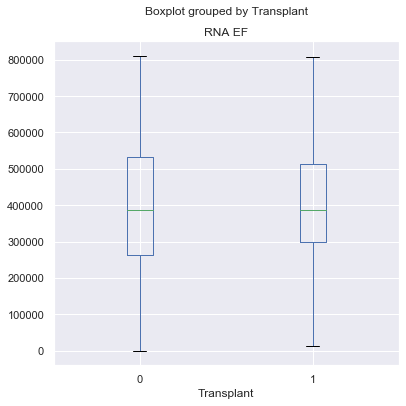

In [111]:
data.boxplot('RNA EF', by='Transplant', figsize=(6, 6))

# Modeling -- FIX ME 

In [134]:
#this is a logreg with JUST categorical variables-- how to use categorical and continuous?

# Convert categories using get_dummies() 
x_feats = ['Gender', 'Fever', 'Nausea/Vomting', 'Headache', 'Diarrhea', 'Fatigue & generalized bone ache', 'Jaundice', 'Epigastric pain', 'Baseline histological Grading']
X = pd.get_dummies(data[x_feats], drop_first=True, dtype=float)

# Convert target using get_dummies
y = pd.get_dummies(data['Transplant'], drop_first=True, dtype=float)
y = y[1]

In [137]:
# Create intercept term required for sm.Logit, see documentation for more information
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

# Get results of the fit
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.567149
         Iterations 5


/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [138]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      1   No. Observations:                 1385
Model:                          Logit   Df Residuals:                     1364
Method:                           MLE   Df Model:                           20
Date:                Wed, 29 Jan 2020   Pseudo R-squ.:                 0.01277
Time:                        13:58:43   Log-Likelihood:                -785.50
converged:                       True   LL-Null:                       -795.66
Covariance Type:            nonrobust   LLR p-value:                    0.4378
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.9435      0.295     -3.197      0.001      -1.522      -0.365
Gender_1                             -0.0813      0.124     -0.653      0.514      -0.325       0.163
Fever_1                              -0.1508      0.124     -1.215      0.224      -0.394       0.092
Nausea/Vomting_1                      0.1137      0.125      0.913      0.361      -0.130       0.358
Headache_1                            0.0137      0.124      0.110      0.912      -0.230       0.258
Diarrhea_1                            0.0570      0.124      0.460      0.646      -0.186       0.300
Fatigue & generalized bone ache_1     0.0839      0.124      0.676      0.499      -0.159       0.327
Jaundice_1                            0.0657      0.124      0.531      0.595      -0.177       0.308
Epigastric pain_1                    -0.0898      0.124     -0.723      0.470      -0.333       0.154
Baseline histological Grading_4       0.4490      0.319      1.409      0.159      -0.175       1.073
Baseline histological Grading_6      -0.2417      0.333     -0.725      0.468      -0.895       0.412
Baseline histological Grading_7       0.2895      0.343      0.843      0.399      -0.383       0.963
Baseline histological Grading_8      -0.1067      0.332     -0.322      0.748      -0.757       0.544
Baseline histological Grading_9      -0.0463      0.324     -0.143      0.887      -0.682       0.590
Baseline histological Grading_10     -0.3494      0.352     -0.991      0.322      -1.040       0.341
Baseline histological Grading_11     -0.2853      0.288     -0.992      0.321      -0.849       0.278
Baseline histological Grading_12     -0.2229      0.333     -0.669      0.504      -0.876       0.430
Baseline histological Grading_13      0.0213      0.328      0.065      0.948      -0.622       0.664
Baseline histological Grading_14      0.0340      0.321      0.106      0.916      -0.595       0.663
Baseline histological Grading_15     -0.2207      0.310     -0.712      0.476      -0.828       0.386
Baseline histological Grading_16     -0.5412      0.365     -1.484      0.138      -1.256       0.174
=====================================================================================================
"""

In [139]:
np.exp(result.params)
#these are probabilities of exhibiting the predictor

const                                0.389271
Gender_1                             0.921929
Fever_1                              0.860059
Nausea/Vomting_1                     1.120424
Headache_1                           1.013845
Diarrhea_1                           1.058695
Fatigue & generalized bone ache_1    1.087481
Jaundice_1                           1.067917
Epigastric pain_1                    0.914084
Baseline histological Grading_4      1.566744
Baseline histological Grading_6      0.785254
Baseline histological Grading_7      1.335772
Baseline histological Grading_8      0.898806
Baseline histological Grading_9      0.954791
Baseline histological Grading_10     0.705144
Baseline histological Grading_11     0.751777
Baseline histological Grading_12     0.800221
Baseline histological Grading_13     1.021499
Baseline histological Grading_14     1.034586
Baseline histological Grading_15     0.801991
Baseline histological Grading_16     0.582035
dtype: float64

# KNN

In [148]:
from scipy.spatial.distance import euclidean
import numpy as np

In [149]:
#create KNN class
class KNN:
    def fit():
        pass
    def predict():
        pass

In [150]:
#complete the fit() method:
# self = instance method of KNN class
#X_train: array, each row is a vector of a given point in space
# y_train: corresponding labels for each vector in X_train 
def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train
    
# This line updates the knn.fit method to point to the function you've just written
KNN.fit = fit

In [151]:
#helper function: creates empty array to hold euclidean distance between x and X_Train
#Creates tuple using index and the distance, append to array
#return the distance arrray when distance has been generated for all items in self.X_train
def _get_distances(self, x):
    distances = []
    for ind, val in enumerate(self.X_train):
        dist_to_i = euclidean(x, val)
        distances.append((ind, dist_to_i))
    return distances

# This line attaches the function you just created as a method to KNN class 
KNN._get_distances = _get_distances

In [ ]:
#function to retreive indices of k-nearest points
#3 arguments: 1) self
# 2)dists: an array of tuples containing (index, distance), from _get_distances()
# 3) k: the number of distances you want to return
#sort dists array by values (the second element in each tuple)
#return first k tuples from the sorted array
def _get_k_nearest(self, dists, k):
    sorted_dists = sorted(dists, key=lambda x: x[1])
    return sorted_dists[:k]

# This line attaches the function you just created as a method to KNN class 
KNN._get_k_nearest = _get_k_nearest

# Regression Decision Tree -- don't use this

In [61]:
# implementing the tree using scikit learn
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
#import matplotlib.pyplot as plt
#import seaborn as sns
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue & generalized bone ache', 'Jaundice',
       'Epigastric pain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Transplant'],
      dtype='object')

In [62]:
# build a regression tree from sklearn 
# define predictors and predicted variables
# predictors: X
X = data[['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue & generalized bone ache', 'Jaundice',
       'Epigastric pain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading']]
# outcome: y
y = data.Transplant
#X1 refers to Years, and X0 refers to Hits

In [63]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [64]:
#In this case, X0 refers to hits, and X1 refers to years
# instantiate a regression instance
regTree = DecisionTreeRegressor(max_depth=5)#max_depth is a hyperparameter. how many questions do you want to ask?
#this DTR algorithm calculates MSE for each data point
# fit the tree (tree is overfit if sample in last depth is 1)
regTree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

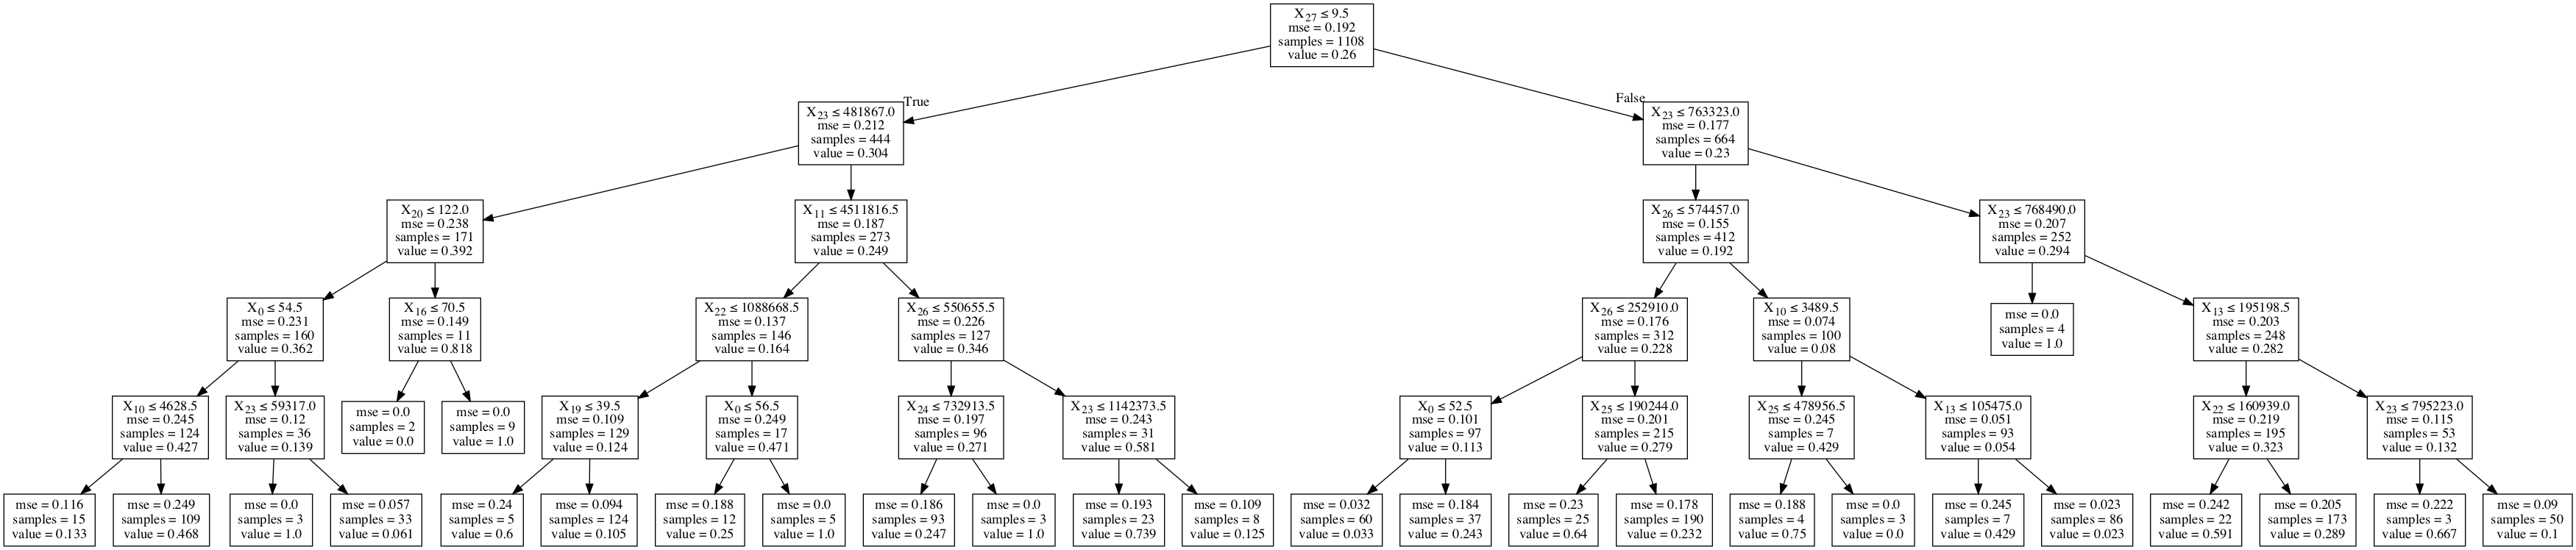

In [65]:
# visualizing the regression tree
dot_data = StringIO()
export_graphviz(regTree, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [66]:
# use the model to predict the testing and compare mse
regPred = regTree.predict(X_test)

In [67]:
# comparing the results and plot them 
mse = mean_squared_error(regPred, y_test)
mse

0.23080421262752787

[-0.19547445173694555, -0.19729274809072583, -0.20496604735163595, -0.21569995557227564, -0.23009682272127263, -0.24900133861007565, -0.2667882268638955, -0.2914981346772887, -0.30332911182424227]


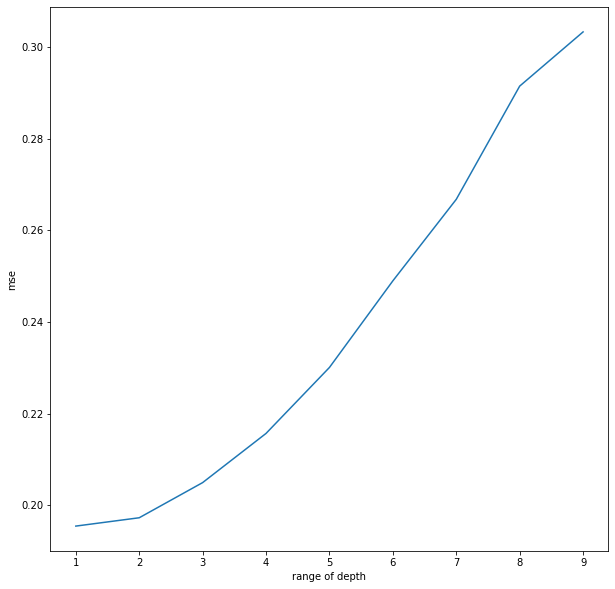

In [68]:
#next step: find optimal depth using cross validation
from sklearn.model_selection import cross_val_score
depth_range = range(1,10)
mse = []
for depth in depth_range:
    regtree = DecisionTreeRegressor(max_depth = depth)
    depth_score = cross_val_score(regtree, X, y, scoring = 'neg_mean_squared_error',cv = 6)
    mse.append(depth_score.mean())
print(mse)
mse = [abs(number) for number in mse]
plt.figure(figsize = (10,10))
plt.plot(depth_range, mse)
plt.xlabel('range of depth')
plt.ylabel('mse')
plt.show()

# Classification tree

In [135]:
X_data=pd.DataFrame(data, columns=['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue & generalized bone ache', 'Jaundice',
       'Epigastric pain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading'])
y_data=data.Transplant

AttributeError: 'DataFrame' object has no attribute 'Transplant'

In [67]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Transplant
0,56.0,0,35.0,0,0,0,0,0,0,0,7425.0,4248807.0,14.0,112132.0,99.0,84.0,52.0,109.0,81.0,84.0,84.0,34.0,655330.0,634536.0,288194.0,386384.0,387088.0,13,0
1,46.0,0,29.0,0,0,0,0,0,0,0,12101.0,4429425.0,10.0,129367.0,91.0,123.0,95.0,75.0,113.0,57.0,123.0,44.0,40620.0,538635.0,637056.0,336804.0,31085.0,4,0
2,57.0,0,33.0,0,0,0,0,0,0,0,4178.0,4621191.0,12.0,151522.0,113.0,49.0,95.0,107.0,116.0,84.0,84.0,34.0,571148.0,661346.0,406373.0,735945.0,558829.0,4,1
3,49.0,0,33.0,0,0,0,0,0,0,0,6490.0,4794631.0,10.0,146457.0,43.0,64.0,109.0,80.0,88.0,48.0,77.0,33.0,1041941.0,449939.0,585688.0,744463.0,582301.0,10,0
4,59.0,0,32.0,0,0,0,0,0,0,0,3661.0,4606375.0,11.0,187684.0,99.0,104.0,67.0,48.0,120.0,94.0,90.0,30.0,660410.0,738756.0,3731527.0,338946.0,242861.0,11,0


In [68]:
y_data = y_data.astype('int')

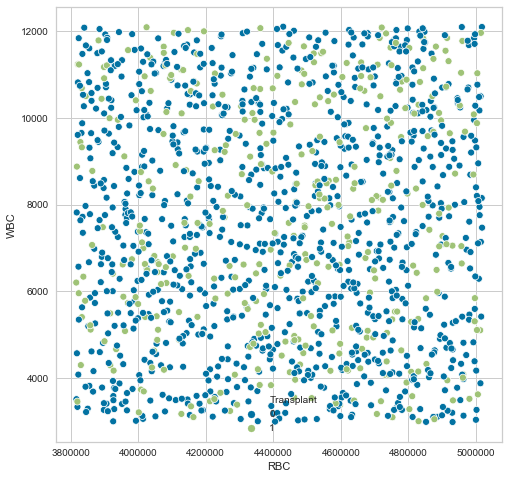

In [69]:
import seaborn as sns

fig = plt.figure(figsize = (8,8))
sns.scatterplot(x = X_data['RBC'], y = X_data['WBC'], hue =data.Transplant)

In [70]:
X_train_data,X_test_data,y_train_data,y_test_data = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

In [71]:
from sklearn.tree import DecisionTreeClassifier
ctree=DecisionTreeClassifier(max_depth = 2)
ctree.fit(X_train_data,y_train_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

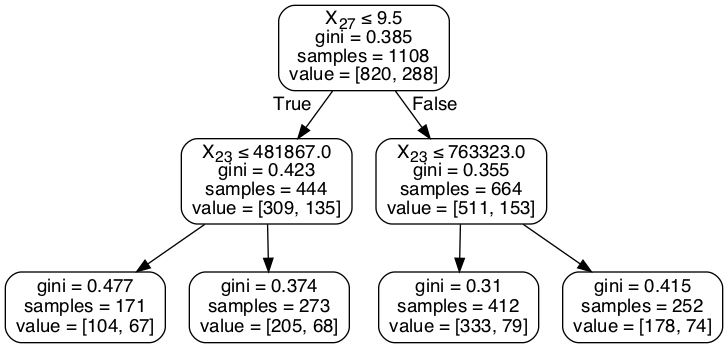

In [72]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [73]:
clasPred = ctree.predict(X_test_data)

In [ ]:
#interpretation: ginis are high (close to 0.5)
#visualize this:
# https://www.kaggle.com/arthurtok/decision-boundaries-visualised-via-python-plotly

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_data, clasPred)

0.7328519855595668

In [98]:
#the value row tells us how many of the observations that were sorted into that node fall into each of the categoriesb

[0.7364920237722865, 0.7350064792886188, 0.7328480569581602, 0.7176409431461043, 0.7081585414897895, 0.6901824627254717, 0.6757933032456023, 0.6649549428779957, 0.6526877876580722]


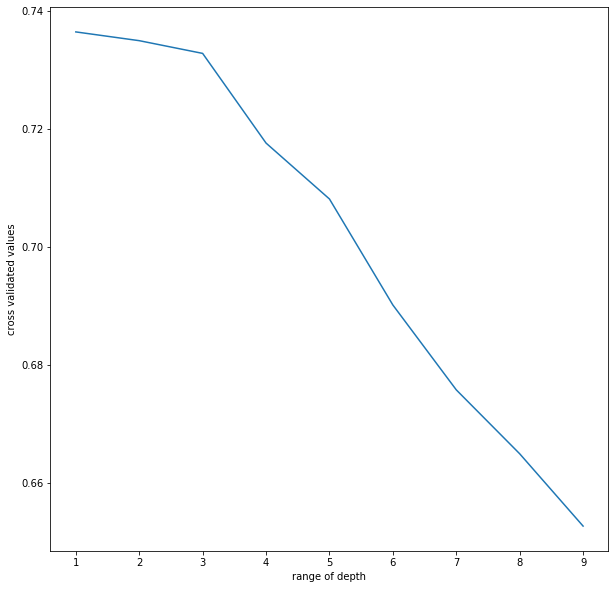

In [32]:
#find optimal depth of the tree
from sklearn.model_selection import cross_val_score
score = cross_val_score(ctree, X_data, y_data, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X_data, y_data, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

In [38]:
#confusion matrix

# Bagged trees for Random Forests

In [115]:
#boostrap samples with replacement from training dataset to prevent overfitting
#Tree has low bias and high variance

In [133]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
#when importing CSV next time, assign index column
#salaries = pd.read_csv('salaries_final.csv', index_col=0)

In [134]:
#split outcome and predictor variables
transplant = data['Transplant']
data = data.drop('Transplant', axis = 1)

KeyError: 'Transplant'

In [101]:
data.head()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Gender_0,Fever_0,Nausea/Vomting_0,Headache_0,Diarrhea_0,Fatigue & generalized bone ache_0,Jaundice_0,Epigastric pain_0,Baseline histological Grading_3,Baseline histological Grading_4,Baseline histological Grading_6,Baseline histological Grading_7,Baseline histological Grading_8,Baseline histological Grading_9,Baseline histological Grading_10,Baseline histological Grading_11,Baseline histological Grading_12,Baseline histological Grading_13,Baseline histological Grading_14,Baseline histological Grading_15,Baseline histological Grading_16
0,56.0,35.0,7425.0,4248807.0,14.0,112132.0,99.0,84.0,52.0,109.0,81.0,84.0,84.0,34.0,655330.0,634536.0,288194.0,386384.0,387088.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,46.0,29.0,12101.0,4429425.0,10.0,129367.0,91.0,123.0,95.0,75.0,113.0,57.0,123.0,44.0,40620.0,538635.0,637056.0,336804.0,31085.0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,57.0,33.0,4178.0,4621191.0,12.0,151522.0,113.0,49.0,95.0,107.0,116.0,84.0,84.0,34.0,571148.0,661346.0,406373.0,735945.0,558829.0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,49.0,33.0,6490.0,4794631.0,10.0,146457.0,43.0,64.0,109.0,80.0,88.0,48.0,77.0,33.0,1041941.0,449939.0,585688.0,744463.0,582301.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,59.0,32.0,3661.0,4606375.0,11.0,187684.0,99.0,104.0,67.0,48.0,120.0,94.0,90.0,30.0,660410.0,738756.0,3731527.0,338946.0,242861.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [129]:
transplant = transplant.astype('int')

0    0
1    0
2    1
3    0
4    0
Name: Transplant, dtype: int64

In [103]:
#create dummy columns with categorical variables
data = pd.get_dummies(data)
data.tail()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Gender_0,Fever_0,Nausea/Vomting_0,Headache_0,Diarrhea_0,Fatigue & generalized bone ache_0,Jaundice_0,Epigastric pain_0,Baseline histological Grading_3,Baseline histological Grading_4,Baseline histological Grading_6,Baseline histological Grading_7,Baseline histological Grading_8,Baseline histological Grading_9,Baseline histological Grading_10,Baseline histological Grading_11,Baseline histological Grading_12,Baseline histological Grading_13,Baseline histological Grading_14,Baseline histological Grading_15,Baseline histological Grading_16
1380,44.0,29.0,7044.0,4957174.0,15.0,202520.0,122.0,59.0,78.0,106.0,127.0,63.0,44.0,45.0,387795.0,55938.0,406373.0,386384.0,387088.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1381,55.0,34.0,6207.0,4636951.0,10.0,115776.0,128.0,102.0,65.0,99.0,108.0,97.0,64.0,41.0,481378.0,152961.0,393339.0,73574.0,236273.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1382,42.0,26.0,4913.0,4122038.0,14.0,128354.0,61.0,93.0,123.0,61.0,116.0,87.0,39.0,24.0,612664.0,572756.0,806109.0,343719.0,160457.0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1383,52.0,29.0,7257.0,4241990.0,10.0,205908.0,70.0,97.0,104.0,74.0,47.0,48.0,81.0,43.0,139872.0,76161.0,515730.0,2460.0,696074.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1384,55.0,26.0,11832.0,4059176.0,14.0,136615.0,51.0,126.0,39.0,68.0,115.0,64.0,71.0,34.0,1190577.0,628730.0,406373.0,386384.0,387088.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [104]:
data_train, data_test, transplant_train, transplant_test = train_test_split(data, transplant, 
                                                                    test_size = 0.25, random_state=123)

In [105]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3) 
tree_clf.fit(data_train, transplant_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [106]:
# Feature importance
tree_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.32747412, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.17130735, 0.17290772, 0.08741446,
       0.12820206, 0.        , 0.11269429, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

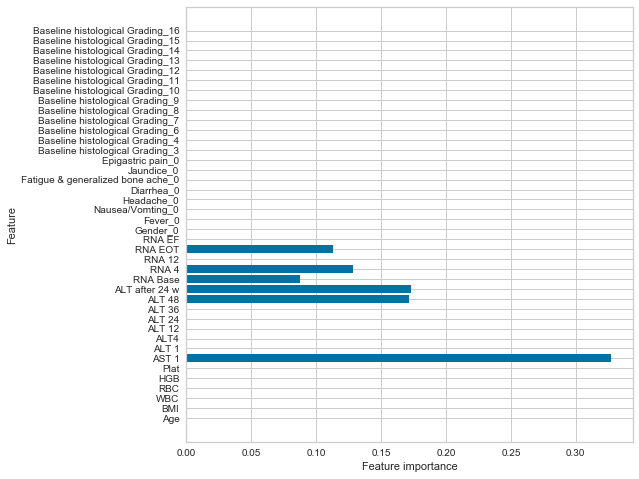

In [107]:
#train feature importance
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [108]:
# Test set predictions for bootstrapped 
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(transplant_test, pred))
print(classification_report(transplant_test, pred))

[[251   4]
 [ 92   0]]
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       255
           1       0.00      0.00      0.00        92

    accuracy                           0.72       347
   macro avg       0.37      0.49      0.42       347
weighted avg       0.54      0.72      0.62       347



In [109]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(transplant_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 72.33%


In [110]:
# Instantiate a BaggingClassifier (changed maxdepth to 3 from 5)
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3), 
                                 n_estimators=20)

In [111]:
# Fit to the training data
bagged_tree.fit(data_train, transplant_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [112]:
#check accuracy score
# Training accuracy score
bagged_tree.score(data_train, transplant_train)

0.7398843930635838

In [113]:
# Test accuracy score
bagged_tree.score(data_test, transplant_test)

0.7348703170028819

# Begin random forests model

In [114]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 3)
forest.fit(data_train, transplant_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
# Training accuracy score
forest.score(data_train, transplant_train)

0.7398843930635838

In [117]:
# Test accuracy score
forest.score(data_test, transplant_test)

0.7348703170028819

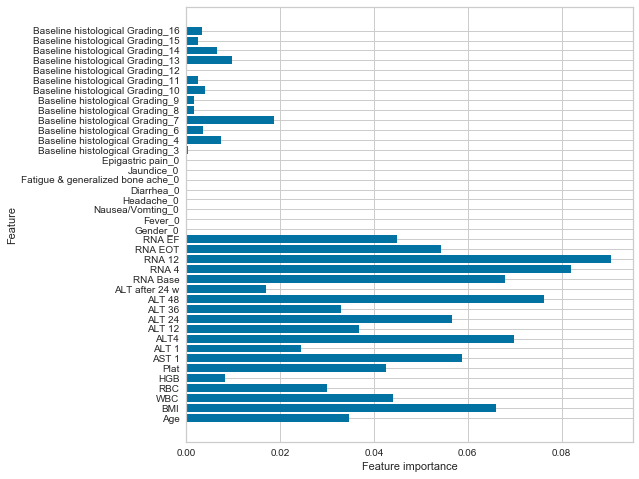

In [118]:
plot_feature_importances(forest)

In [119]:
#create forest with small trees (max depth = 2)
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(data_train, transplant_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [121]:
#adjust max_features (use fewer). store in .estimators_ attribute
#get the first tree and store it
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

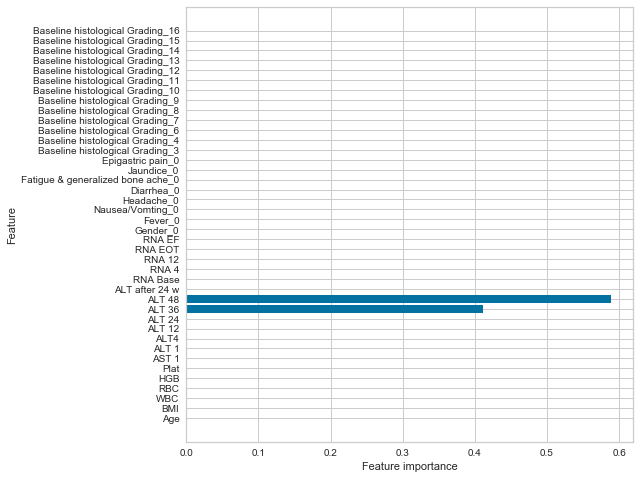

In [122]:
#these are the features given to the tree during subspace sampling
# Feature importance of tree 1 from forest 2
plot_feature_importances(rf_tree_1)

In [123]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

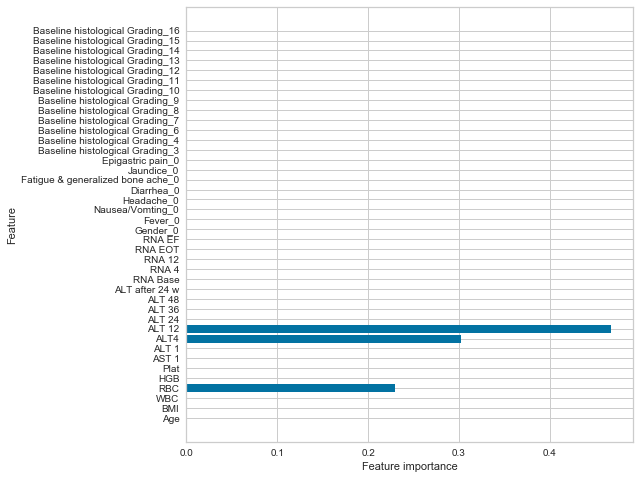

In [124]:
# Feature importance
plot_feature_importances(rf_tree_2)

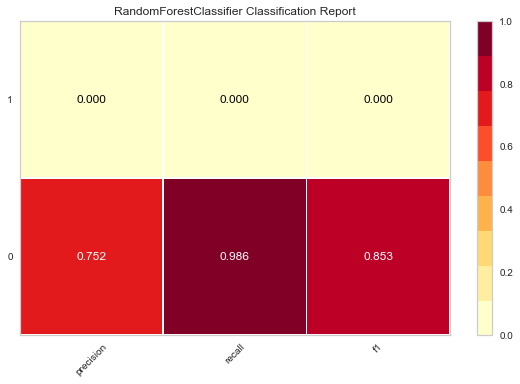

In [127]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import classification_report


X = data
y = transplant
visualizer = classification_report(
    RandomForestClassifier(n_estimators=20), X, y
)

# GridSearch CV

In [179]:
#try this in separate notebook
#used to determine valuable parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Gender_0,Fever_0,Nausea/Vomting_0,Headache_0,Diarrhea_0,Fatigue & generalized bone ache_0,Jaundice_0,Epigastric pain_0,Baseline histological Grading_3,Baseline histological Grading_4,Baseline histological Grading_6,Baseline histological Grading_7,Baseline histological Grading_8,Baseline histological Grading_9,Baseline histological Grading_10,Baseline histological Grading_11,Baseline histological Grading_12,Baseline histological Grading_13,Baseline histological Grading_14,Baseline histological Grading_15,Baseline histological Grading_16
count,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.0,1385.0,1385.0,1385.0,1385.0,1385.0,1385.0,1385.0,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,28.608664,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.288809,83.800722,33.501083,5.909512e+05,6.013275e+05,4.017151e+05,394786.355235,398140.533574,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.064260,0.067870,0.073646,0.051986,0.070036,0.074368,0.062816,0.154513,0.072924,0.068592,0.076534,0.100361,0.062094
std,8.781506,4.076215,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.146769,25.966617,6.948315,3.539354e+05,3.619547e+05,2.220597e+05,195584.622749,198375.078731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245304,0.251614,0.261289,0.222078,0.255300,0.262464,0.242719,0.361570,0.260106,0.252850,0.265947,0.300589,0.241413
min,32.000000,22.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,22.000000,1.100000e+01,1.900000e+02,6.170000e+02,408.000000,570.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,25.000000,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.725070e+05,2.699330e+05,284760.000000,275007.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,29.000000,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,84.000000,34.000000,5.931030e+05,5.981280e+05,4.063730e+05,386384.000000,387088.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.000000,32.000000,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61.000000,35.000000,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


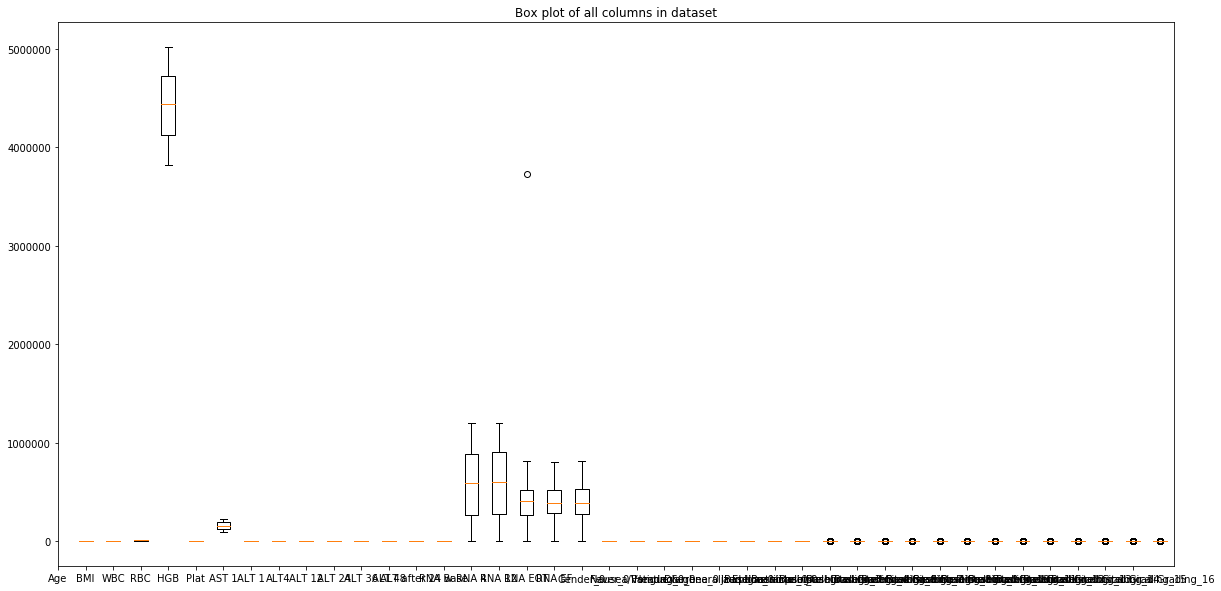

In [180]:
#EDA -- this is bad but maybe try on continuous normalized variables l8r
# Explore the dataset
display(data.describe())

# Create a box plot of each column
plt.figure(figsize=(20, 10))
plt.boxplot([data[col] for col in data.columns])
plt.title("Box plot of all columns in dataset")
plt.xticks(range(len(data.columns.values)), data.columns.values)
plt.show()

In [188]:
data.head()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Gender_0,Fever_0,Nausea/Vomting_0,Headache_0,Diarrhea_0,Fatigue & generalized bone ache_0,Jaundice_0,Epigastric pain_0,Baseline histological Grading_3,Baseline histological Grading_4,Baseline histological Grading_6,Baseline histological Grading_7,Baseline histological Grading_8,Baseline histological Grading_9,Baseline histological Grading_10,Baseline histological Grading_11,Baseline histological Grading_12,Baseline histological Grading_13,Baseline histological Grading_14,Baseline histological Grading_15,Baseline histological Grading_16
0,56.0,35.0,7425.0,4248807.0,14.0,112132.0,99.0,84.0,52.0,109.0,81.0,84.0,84.0,34.0,655330.0,634536.0,288194.0,386384.0,387088.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,46.0,29.0,12101.0,4429425.0,10.0,129367.0,91.0,123.0,95.0,75.0,113.0,57.0,123.0,44.0,40620.0,538635.0,637056.0,336804.0,31085.0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,57.0,33.0,4178.0,4621191.0,12.0,151522.0,113.0,49.0,95.0,107.0,116.0,84.0,84.0,34.0,571148.0,661346.0,406373.0,735945.0,558829.0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,49.0,33.0,6490.0,4794631.0,10.0,146457.0,43.0,64.0,109.0,80.0,88.0,48.0,77.0,33.0,1041941.0,449939.0,585688.0,744463.0,582301.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,59.0,32.0,3661.0,4606375.0,11.0,187684.0,99.0,104.0,67.0,48.0,120.0,94.0,90.0,30.0,660410.0,738756.0,3731527.0,338946.0,242861.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [186]:
# #isolate target variable -- since i did this earlier, do i do it again? try in separate notebook
y = data['Transplant']
X = data.drop('Transplant', axis=1)
X.head()

KeyError: 'Transplant'

In [187]:
y = y.astype('int')

In [184]:
# Split the data into training and test sets
#what is random state?
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [185]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'unknown'